# Custom DFT for hi-res low-freqs spectrograms

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

In [98]:
N = 512
t = np.linspace(0, 1, N)
f = np.linspace(0, N//2, N)
# f = np.linspace(0, N//4, N).reshape(-1, 1)

T, F = np.meshgrid(t, f)

In [99]:
# (f*t).shape
E.shape

(512, 512)

In [105]:
E = np.exp(-2j * np.pi * F * T)
# E = np.exp(-2j * np.pi * f * t)

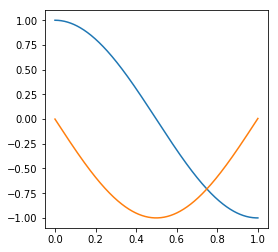

In [101]:
i = 2
plt.plot(t, np.real(E[i]))
plt.plot(t, np.imag(E[i]))

In [102]:
# plt.imshow(np.real(E))
# plt.imshow(np.imag(E))
# plt.savefig('ff.png', , dpi=300)
with open('ff.png', 'wb') as f:
    plt.imsave(f, np.imag(E), cmap='viridis', origin='lower')

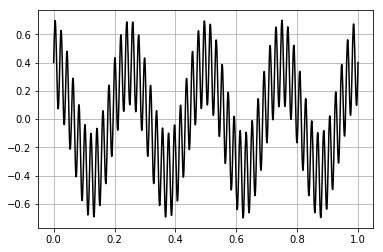

In [20]:
N = 1024
# t_end = 8
t_end = 1
t = np.linspace(0, t_end, N)
# t = np.arange(t_end)
rate = N / t_end
c0 = 0.4 * np.cos(2*np.pi * 4 * t)
s0 = 0.3 * np.sin(2*np.pi * 51 * t)
signal = c0 + s0 

plt.grid()
plt.plot(t, signal, 'k-')

In [21]:
f = np.linspace(0, N//4, N*2)
T, F = np.meshgrid(t, f)
E = np.exp(-2j * np.pi * F * T)

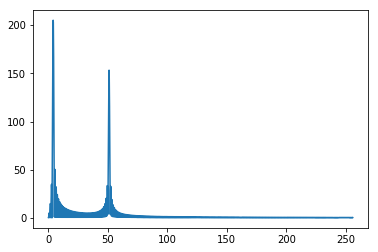

In [22]:
corr = E @ signal
# magnitude = 20 * np.log10(np.abs(corr))
magnitude = np.abs(corr)

# slic = 100

# plt.plot(f[:slic], magnitude[:slic])
plt.plot(f, magnitude)

# corr.shape
# corr

# Spectrogram helper functions

# Unoptimised spectrogram using `for` loop
```
  1 second = 44100 samples
1/4 second = 11025 samples
```

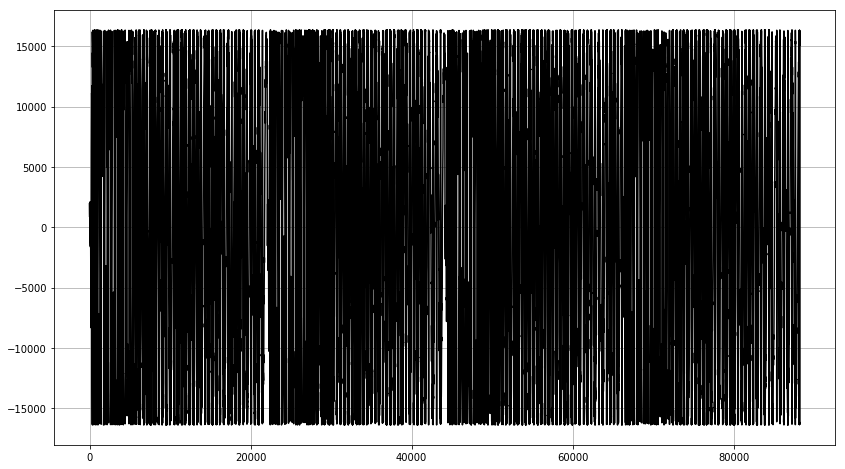

In [62]:
from scipy.io import wavfile
rate, x = wavfile.read('bar.wav')
left_channel  = x[:, 0]
right_channel = x[:, 1]
signal = (left_channel + right_channel) / 2 # average left and right channels to mono signal
N = len(signal)
N

plt.grid()
plt.plot(signal, 'k-')

In [60]:
# left_channel.shape
right_channel.shape

(88200,)

In [72]:
nperseg  = 11025
noverlap = 3000
step = nperseg - noverlap



spectrogram = np.empty( ((signal.shape[-1] - noverlap) // step, nperseg) )
# spectrogram = np.empty( (nperseg, (signal.shape[-1] - noverlap) // step)  )
print(spectrogram.shape)

t = np.linspace(0, nperseg / rate, nperseg)
f = np.linspace(0, nperseg//4, nperseg)

# print(t.shape, f.shape)
# T, F = np.meshgrid(t, f)
# E = np.exp(-2j * np.pi * F * T)

# j = 0
# for i in range(0, N, step):
#     print(j)
#     chunk = signal[i : i + nperseg]
    
#     corr = E @ chunk
#     magnitude = np.abs(corr)
    
#     spectrogram[j] = magnitude
#     j += 1

# plt.imshow(spectrogram.T)

(10, 11025)


In [ ]:
f = np.linspace(0, N//4, N*2)
T, F = np.meshgrid(t, f)
E = np.exp(-2j * np.pi * F * T)

corr = E @ signal
# magnitude = 20 * np.log10(np.abs(corr))
magnitude = np.abs(corr)

# slic = 100

# plt.plot(f[:slic], magnitude[:slic])
plt.plot(f, magnitude)

# corr.shape
# corr

In [63]:
x = np.arange(8)
x
nperseg  = 3
noverlap = 2
step = nperseg - noverlap

((x.shape[-1] - noverlap) // step, nperseg)
# x.shape
# x.shape[-1] 

(6, 3)